# 넷플릭스 주가 데이터 분석

### 공통 요구사항
* 캐글을 활용하여 데이터를 다운로드 받아 활용합니다
  * 데이터셋 : [“Netfilx Stock Price Prediction(넷플릭스 주식 가격 데이터)”](https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)
  * 데이터셋 요약 : 2018-02-05 ~ 2022-02-04 까지의 일별 데이터

+ 요구사항 이외에는 자유롭게 작성해도 무관합니다.

## A. 데이터 전처리 -데이터 읽어오기

- Pandas를 사용하여 csv파일(NLFX.csv)을 DataFrame으로 읽어옵니다.
* 이 때, ['Date', 'Open', 'High', 'Low', 'Close'] 필드만 읽어오도록 구성합니다

In [17]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# CSV 파일 경로
csv_path = "archive/NFLX.csv"

# CSV 파일 읽어오기
cols = [ 'Date', 'Open', 'High', 'Low', 'Close'] 
df = pd.read_csv(csv_path, usecols=cols)

# DataFrame 출력
df



,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [20]:
df.dtypes


Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## B. 데이터 전처리 - 데이터 읽어오기

- csv 파일을 DataFrame으로 읽어와 2021년 이후의 데이터만 필터링합니다.
* 필터링이 완료된 DataFrame의 종가 데이터를 Matplotlib을 사용하여 시각화합니다.

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_21008\109875323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


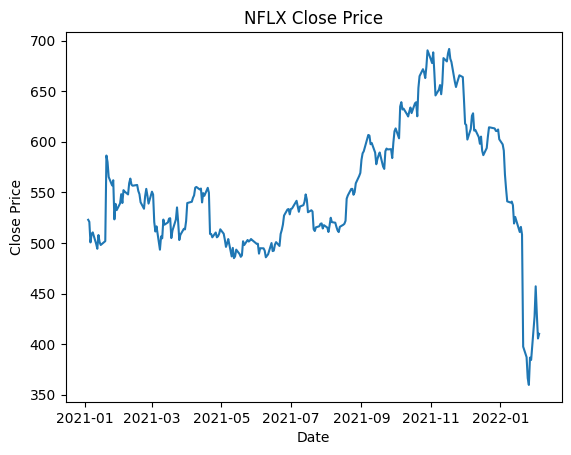

In [21]:
# 데이터필터링(2021년 이후로)
df = df[df['Date'] >= '2021-01-01']

# 날짜 데이터 변환
df["Date"] = pd.to_datetime(df["Date"])

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df['Date'], df['Close'])


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# 그래프 표시
plt.show()

## C. 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기

- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
* 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.
+ Pandas 의 내장 함수를 사용합니다

In [22]:
max_price = df.max()['Close']
min_price = df.min()['Close']
print("최고 종가 : ", max_price) 
print("최저 종가 : ", min_price) 

최고 종가 :  691.690002
최저 종가 :  359.700012


## D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
* 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.

In [23]:
# 월별로 그룹화 /strftime 은 날짜를 문자열로 표기하는 함수
df["Month"] = df["Date"].dt.strftime("%Y-%m")

# mean 평균을 구하는 함수 // groupby는 그룹별로 분활하여 데이터 통계를 내는 함수
df_month_avg = df.groupby("Month")["Close"].mean()
df_month_avg




# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_month_avg)

# 그래프 제목 설정
plt.title('NFLX Average Close Price')

# x축 레이블 설정 / 글자 크기 및 방향 설정
plt.xlabel('Date')
plt.xticks(fontsize= 7, rotation = 45)

# y축 레이블 설정
plt.ylabel('Average Close Price')

# 그리드 생성
plt.grid()

# 그래프 표시
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_21008\579634514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.strftime("%Y-%m")


Month
2021-01    526.816845
2021-02    548.959999
2021-03    518.123482
2021-04    533.136662
2021-05    496.714497
2021-06    503.324091
2021-07    528.653330
2021-08    532.346817
2021-09    590.795239
2021-10    642.202849
2021-11    667.524286
2021-12    608.484089
2022-01    487.853500
2022-02    425.595009
Name: Close, dtype: float64

## E. 데이터 시각화 – 2022년 이후 최고, 최저, 종가 시각화하기

-  csv 파일을 DataFrame 으로 읽어와 2022년 이후의 데이터만 필터링합니다.
*  Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 아래와 같이 시각화 합니다

In [24]:
# 2022년 이후 데이터 필터링
df_after_2022 = df[df["Date"] >= "2022-01-01"]

# 출력하기
df_after_2022

,Date,Open,High,Low,Close,Month
985,2022-01-03,605.609985,609.989990,590.559998,597.369995,2022-01
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,2022-01
987,2022-01-05,592.000000,592.840027,566.880005,567.520020,2022-01
988,2022-01-06,554.340027,563.359985,542.010010,553.289978,2022-01
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,2022-01
990,2022-01-10,538.489990,543.690002,526.320007,539.849976,2022-01
991,2022-01-11,536.989990,543.909973,530.070007,540.840027,2022-01
992,2022-01-12,544.270020,544.270020,532.020020,537.219971,2022-01
993,2022-01-13,537.059998,540.789978,518.260010,519.200012,2022-01
994,2022-01-14,517.599976,538.369995,511.880005,525.690002,2022-01


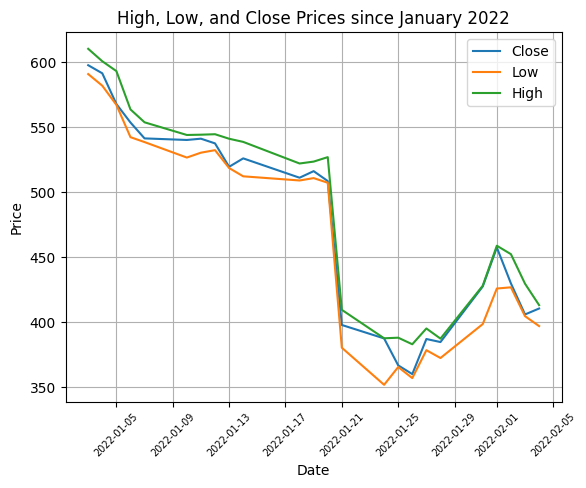

In [25]:
# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low, and Close Prices since January 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x축 레이블을 45도 회전
plt.xticks(fontsize= 7, rotation=45)

# 범례 표시
plt.legend()

# 그리드 생성
plt.grid()

# 그래프 표시
plt.show()